In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('book.csv')
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [46]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [48]:
df1=df.copy()

In [49]:
df1.shape

(2000, 11)

In [50]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

In [51]:
# create a transaction encoder
te=TransactionEncoder()
te_df=te.fit_transform(df)
te_df=pd.DataFrame(te_df,columns=te.columns_)
te_df

,A,B,C,D,F,G,I,R,Y,a,...,h,i,k,l,n,o,r,s,t,u
0,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,True,True,True
2,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
3,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
item_sets={}

In [53]:
te_ary=te.fit(df).transform(df)

In [54]:
ap=pd.DataFrame(te_ary,columns=te.columns_)

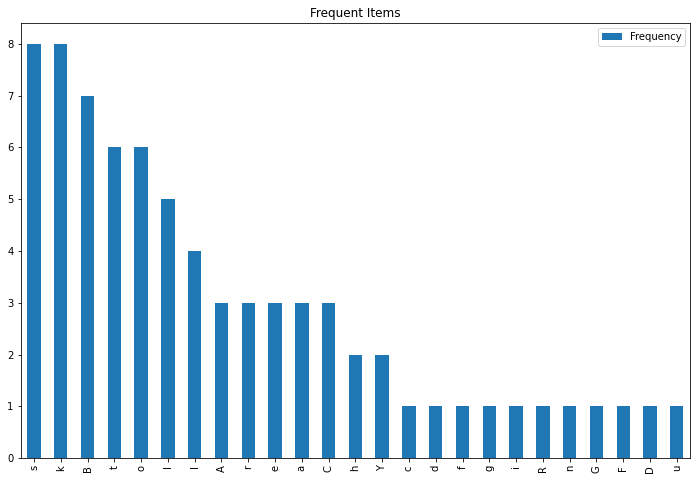

In [55]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# Apriori Algorithm

In [56]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [57]:
confidence=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [58]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [59]:
confs=[]

In [60]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)

In [61]:
confs.append(ap_i)

In [62]:
all_conf=pd.concat(confs,axis=1)

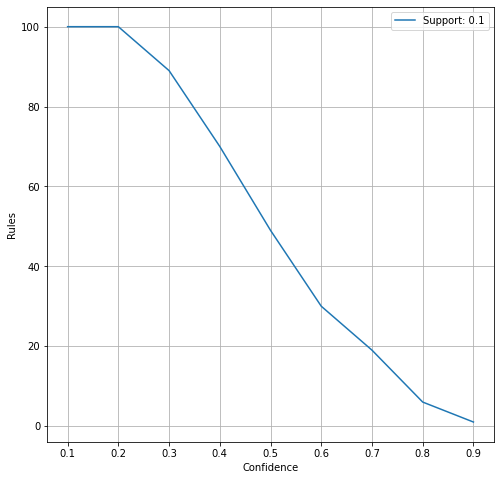

In [63]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Conclusion

### As shown in above graph 
    1.Lower the confidence level Higher the number of       rules
    2.Higher the Support, lower the no.of rules.

## support 0.01 and confidence at 0.4

In [64]:
ap_final=apriori(ap,0.001,True)

In [65]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [66]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
738,"(Y, o)","(B, k, t, s)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf
739,"(Y, s)","(B, k, t, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
742,"(B, t)","(k, s, Y, o)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
744,"(t, o)","(B, k, Y, s)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970


In [67]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

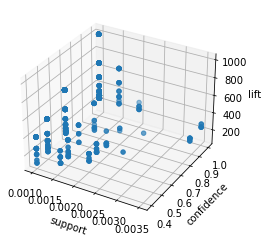

In [68]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

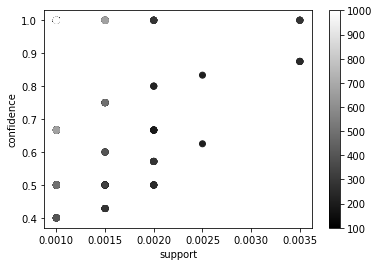

In [69]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")
